1. Problem statement
how students performance test score is affected by other variables such as gender, ethnicity, parental level of edu , lunch and test preperation score

2. data collection

2.1 import data and packages

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import csv as pandas df

In [5]:
df=pd.read_csv("data/study.csv")

In [6]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.shape

(1000, 8)

2.2 dataset info
    gender -> male female
    race/ethnicity -> A B C D E
    parental level of edu 
    lunck
    test prep course
    math score
    reading score
    writing score

3. data checks to perform
    check missing vlues
    check duplicates
    check data type
    check the number of uniq values of each column
    check tatistics of data et
    check various categories present in different categorical column

3.1 check missing values

In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

no missing values

3.2 check duplicate values

In [11]:
df.duplicated().sum()

np.int64(0)

no duplicate values

3.3 check data types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 checking nu of unique values of each column

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 check statistics of data set

In [14]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


insight
1. from above description of numerical data, all meansa are very close to each other
2. all standard deviatios are also clo
3. while there is a minimum score 0 for math for writing minimum is much higher and for reading score 17

3.7 EDA data 

In [19]:
print("Categories in gender variable :", end =" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable :", end =" ")
print(df['race_ethnicity'].unique())

print("Categories in genparental_level_of_educationder variable :", end =" ")
print(df['parental_level_of_education'].unique())

print("Categories in lunch variable :", end =" ")
print(df['lunch'].unique())

print("Categories in test_preparation_course variable :", end =" ")
print(df['test_preparation_course'].unique())


Categories in gender variable : ['female' 'male']
Categories in race_ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in genparental_level_of_educationder variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable : ['standard' 'free/reduced']
Categories in test_preparation_course variable : ['none' 'completed']


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [31]:
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype =='O']


print('We have {} numerical feature : {}'.format(len(numerical_features), numerical_features))
print('\nwe have {} numerical features : {}'.format(len(categorical_feature),categorical_feature))

We have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']

we have 5 numerical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding columns for total score and average

In [32]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
df['total_score'] = df['math_score'] + df["reading_score"] +df["writing_score"]

df['average'] = df['total_score']/3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [39]:
reading_full=df[df['reading_score']== 100]['average'].count()

math_full=df[df['math_score']== 100]['average'].count()

writing_full=df[df['writing_score']== 100]['average'].count()

print(f'no of rstudent with fulll marks in reading:  {reading_full}')
print(f'no of rstudent with fulll marks in maath:  {math_full}')
print(f'no of rstudent with fulll marks in writing:  {writing_full}')

no of rstudent with fulll marks in reading:  17
no of rstudent with fulll marks in maath:  7
no of rstudent with fulll marks in writing:  14


In [41]:
reading_less=df[df['reading_score']<= 20]['average'].count()

math_less=df[df['math_score']<= 20]['average'].count()

writing_less=df[df['writing_score']<= 20]['average'].count()

print(f'no of rstudent with less marks in reading:  {reading_less}')
print(f'no of rstudent with less marks in maath:  {math_less}')
print(f'no of rstudent with less marks in writing:  {writing_less}')

no of rstudent with less marks in reading:  1
no of rstudent with less marks in maath:  4
no of rstudent with less marks in writing:  3


insights

1. we get students have performed worst in maath
2. best performance is in reading section


4. EDA Visualization
4.1 visualize average score distribution to make some conclusion
    > hostogram
    > kennel distribution function (KDE)

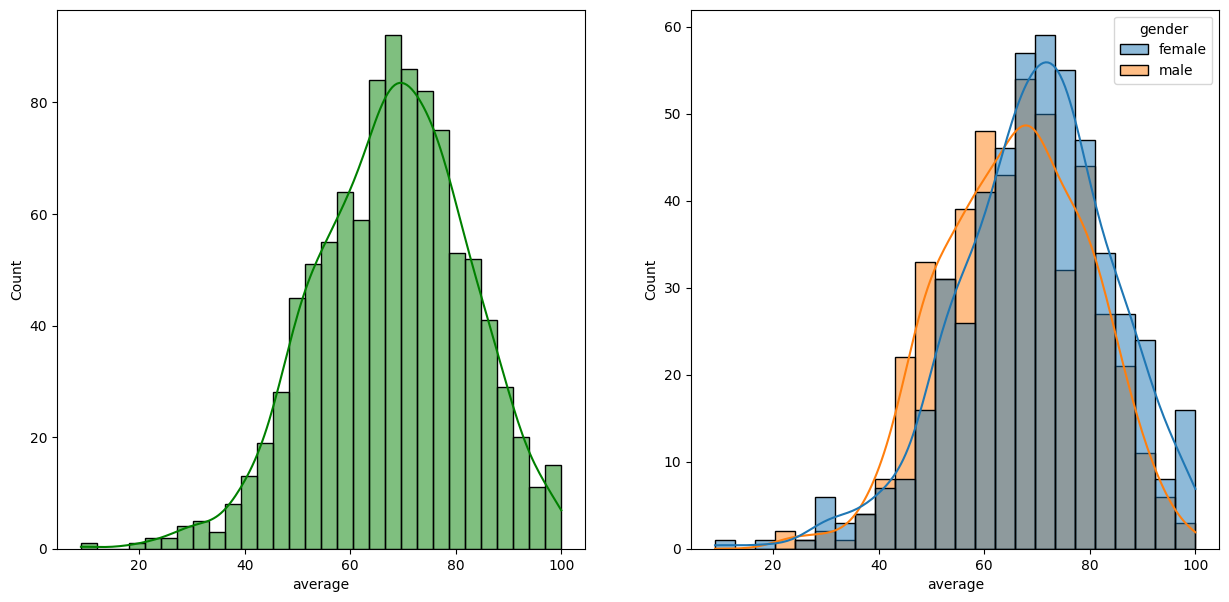

In [52]:
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

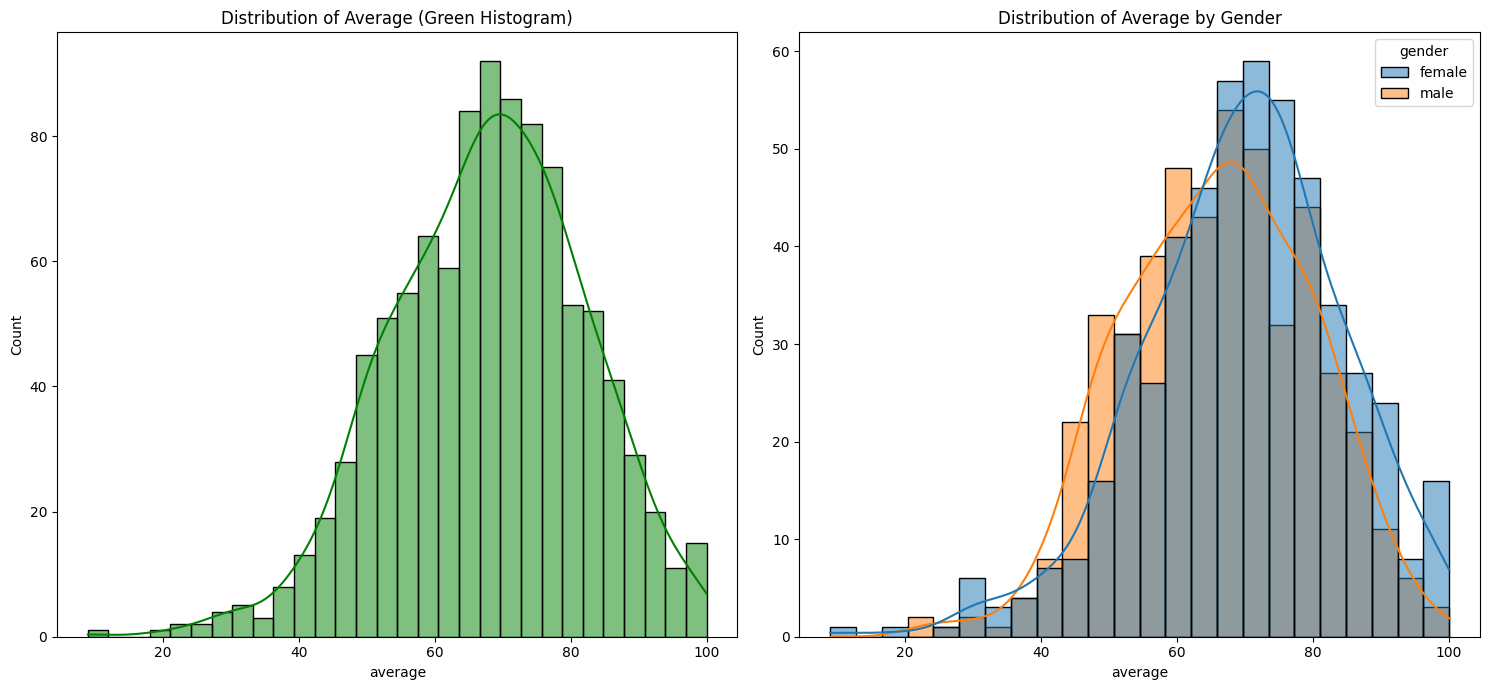

In [53]:


fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: Histogram with KDE and custom color
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of Average (Green Histogram)')

# Second subplot: Histogram with KDE and hue by gender
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of Average by Gender')

plt.tight_layout()
plt.show()


Female works better

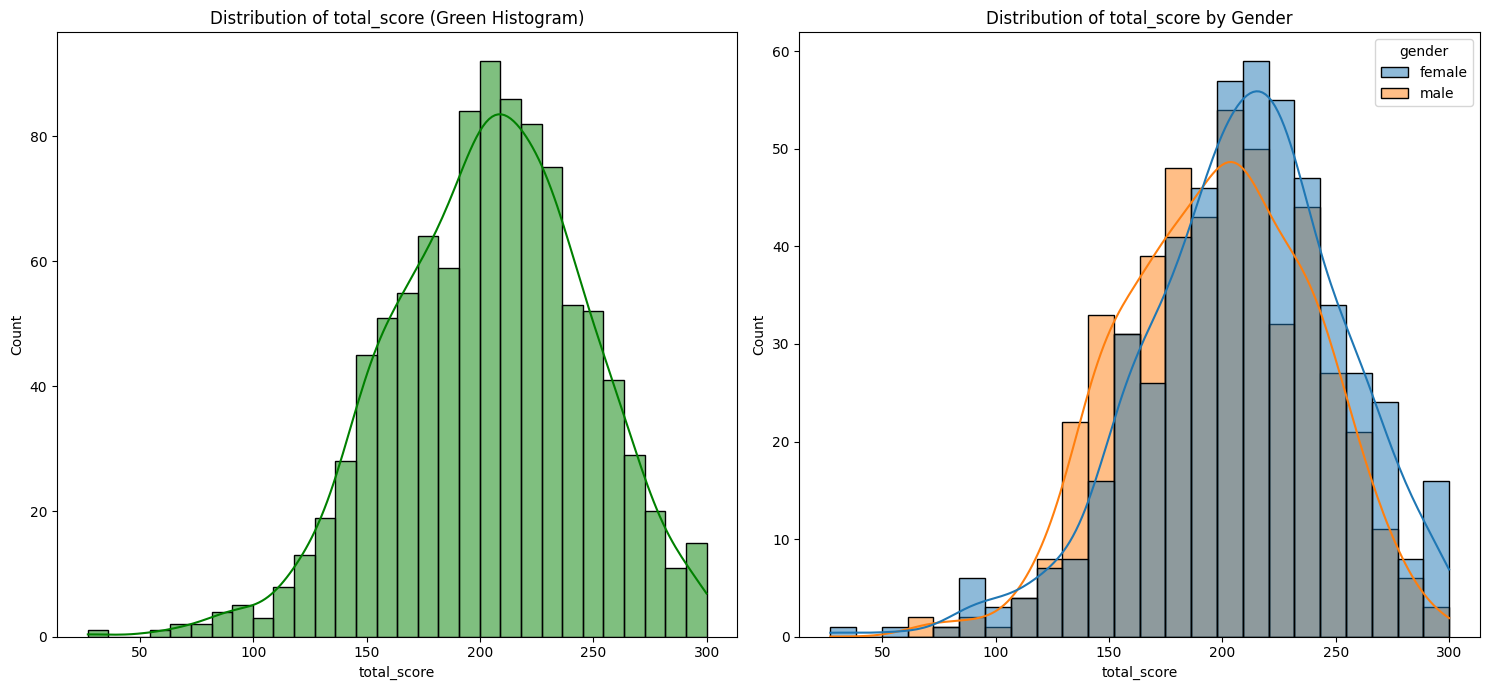

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot: Histogram with KDE and custom color
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Distribution of total_score (Green Histogram)')

# Second subplot: Histogram with KDE and hue by gender
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Distribution of total_score by Gender')

plt.tight_layout()
plt.show()

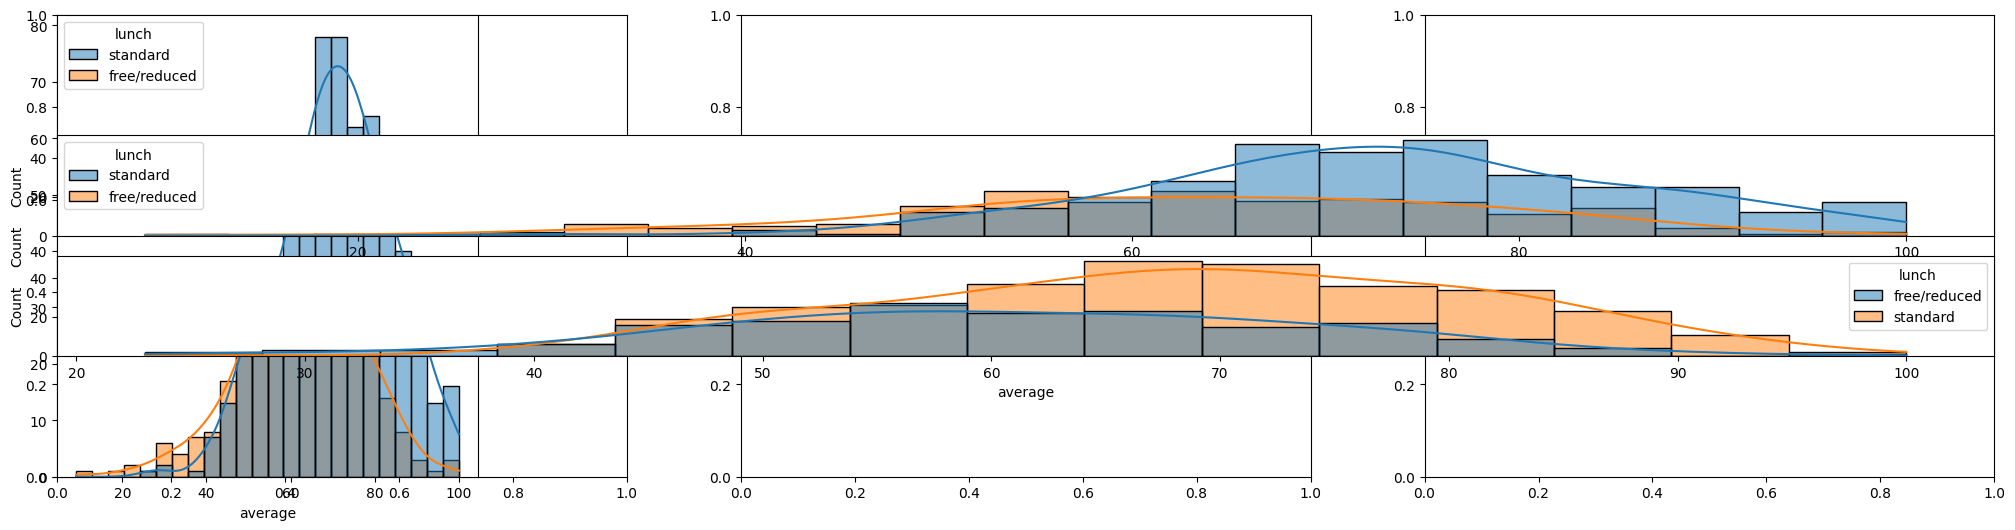

In [60]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(412)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(413)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()